# HAND DIGITS RECOGNIZER USING DEEPLEARNING

#### IMPORT NECCESSARY LIBRARIES

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### SEPARATE DATA INTO TRAIN AND TEST SET

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

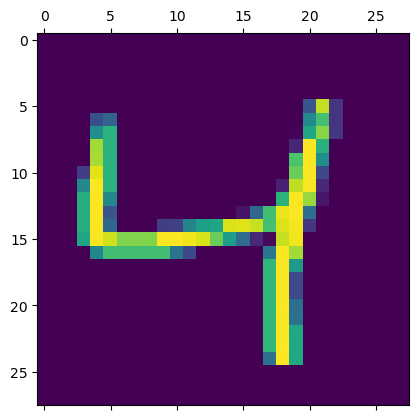

In [10]:
plt.matshow(X_train[2])

In [8]:
y_train[2]

4

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### PERFORM FLATTENNING

In [21]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

#### BUILD AND COMPILE MODEL

In [22]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4718 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3038 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2837 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2730 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2665 - accuracy: 0.9257


In [23]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2674 - accuracy: 0.9256


[0.2673804461956024, 0.925599992275238]

In [24]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.76327820e-02, 3.98461026e-07, 7.70711601e-02, 9.73466933e-01,
       2.20483495e-03, 1.19793959e-01, 1.52069538e-06, 9.99825597e-01,
       1.06776655e-01, 6.52812898e-01], dtype=float32)

In [25]:
np.argmax(y_predicted[0])

7

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted ]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    4,    4,    1,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   7,   10,  919,   21,    7,    2,   12,   10,   41,    3],
       [   2,    0,   15,  929,    0,   25,    3,   10,   19,    7],
       [   2,    1,    5,    2,  911,    0,    9,    5,   11,   36],
       [  10,    3,    2,   37,    6,  775,   16,    4,   33,    6],
       [  16,    3,    6,    1,    7,   11,  911,    1,    2,    0],
       [   2,    5,   22,   11,    5,    0,    0,  951,    5,   27],
       [   7,   12,    5,   27,    9,   26,    9,   10,  864,    5],
       [  11,    7,    1,   12,   23,    6,    0,   26,   10,  913]])>

#### VISUALIZE USING CONFUSION MATRIX

Text(95.72222222222221, 0.5, 'Truth')

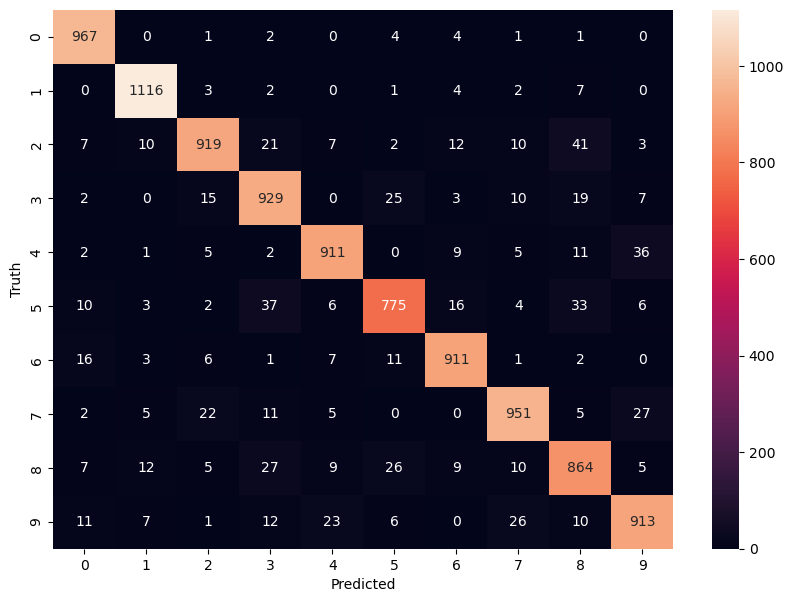

In [29]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### ADD MORE LAYERS TO THE MODEL

In [30]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 12ms/step - loss: 0.2772 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1235 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0858 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0662 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9843


In [32]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0742 - accuracy: 0.9759


[0.07416961342096329, 0.9758999943733215]

Text(95.72222222222221, 0.5, 'Truth')

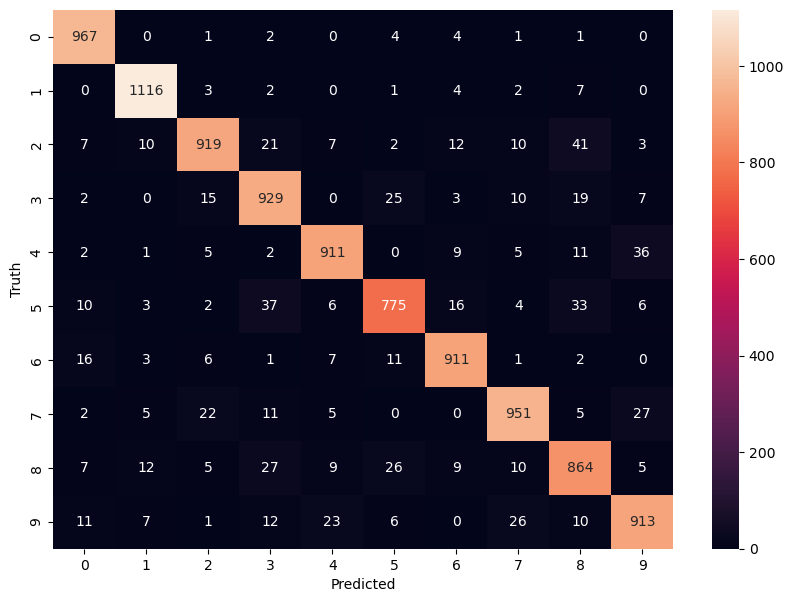

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2735 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1245 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0865 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0652 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0511 - accuracy: 0.9844
